# Polynomial features

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

In [2]:
# toy dataframe with values 1 to 10

df = pd.DataFrame(np.linspace(0, 10, 11), columns=["var"])

df

,var
0,0.0
1,1.0
2,2.0
3,3.0
4,4.0
5,5.0
6,6.0
7,7.0
8,8.0
9,9.0


In [3]:
# let's create features up to a 3rd degree polynomial

poly = PolynomialFeatures(degree=3, interaction_only=False, include_bias=False)

dft = poly.fit_transform(df)

dft

array([[   0.,    0.,    0.],
       [   1.,    1.,    1.],
       [   2.,    4.,    8.],
       [   3.,    9.,   27.],
       [   4.,   16.,   64.],
       [   5.,   25.,  125.],
       [   6.,   36.,  216.],
       [   7.,   49.,  343.],
       [   8.,   64.,  512.],
       [   9.,   81.,  729.],
       [  10.,  100., 1000.]])

In [4]:
# the names of the returned features

poly.get_feature_names_out()

array(['var', 'var^2', 'var^3'], dtype=object)

In [5]:
# capture result in a dataframe

dft = pd.DataFrame(dft, columns=poly.get_feature_names_out())

dft

,var,var^2,var^3
0,0.0,0.0,0.0
1,1.0,1.0,1.0
2,2.0,4.0,8.0
3,3.0,9.0,27.0
4,4.0,16.0,64.0
5,5.0,25.0,125.0
6,6.0,36.0,216.0
7,7.0,49.0,343.0
8,8.0,64.0,512.0
9,9.0,81.0,729.0


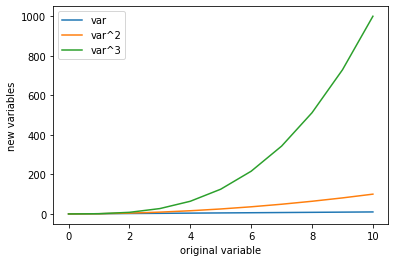

In [6]:
# plot poly features against original variable

plt.plot(df["var"], dft)
plt.legend(dft.columns)
plt.xlabel("original variable")
plt.ylabel("new variables")
plt.show()

In [7]:
# let's add another column

df["col"] = np.linspace(0, 5, 11)
df["feat"] = np.linspace(0, 5, 11)

df

,var,col,feat
0,0.0,0.0,0.0
1,1.0,0.5,0.5
2,2.0,1.0,1.0
3,3.0,1.5,1.5
4,4.0,2.0,2.0
5,5.0,2.5,2.5
6,6.0,3.0,3.0
7,7.0,3.5,3.5
8,8.0,4.0,4.0
9,9.0,4.5,4.5


In [8]:
# let's create features up to a 3rd degree polynomial

poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

dft = poly.fit_transform(df)

dft

array([[ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 1.  ,  0.5 ,  0.5 ,  0.5 ,  0.5 ,  0.25],
       [ 2.  ,  1.  ,  1.  ,  2.  ,  2.  ,  1.  ],
       [ 3.  ,  1.5 ,  1.5 ,  4.5 ,  4.5 ,  2.25],
       [ 4.  ,  2.  ,  2.  ,  8.  ,  8.  ,  4.  ],
       [ 5.  ,  2.5 ,  2.5 , 12.5 , 12.5 ,  6.25],
       [ 6.  ,  3.  ,  3.  , 18.  , 18.  ,  9.  ],
       [ 7.  ,  3.5 ,  3.5 , 24.5 , 24.5 , 12.25],
       [ 8.  ,  4.  ,  4.  , 32.  , 32.  , 16.  ],
       [ 9.  ,  4.5 ,  4.5 , 40.5 , 40.5 , 20.25],
       [10.  ,  5.  ,  5.  , 50.  , 50.  , 25.  ]])

In [9]:
poly.get_feature_names_out()

array(['var', 'col', 'feat', 'var col', 'var feat', 'col feat'],
      dtype=object)

In [10]:
dft = pd.DataFrame(dft, columns=poly.get_feature_names_out())

dft

,var,col,feat,var col,var feat,col feat
0,0.0,0.0,0.0,0.0,0.0,0.00
1,1.0,0.5,0.5,0.5,0.5,0.25
2,2.0,1.0,1.0,2.0,2.0,1.00
3,3.0,1.5,1.5,4.5,4.5,2.25
4,4.0,2.0,2.0,8.0,8.0,4.00
5,5.0,2.5,2.5,12.5,12.5,6.25
6,6.0,3.0,3.0,18.0,18.0,9.00
7,7.0,3.5,3.5,24.5,24.5,12.25
8,8.0,4.0,4.0,32.0,32.0,16.00
9,9.0,4.5,4.5,40.5,40.5,20.25


In [11]:
# let's create features up to a 3rd degree polynomial

poly = PolynomialFeatures(degree=3, interaction_only=True, include_bias=False)

dft = poly.fit_transform(df)

dft

array([[  0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ],
       [  1.  ,   0.5 ,   0.5 ,   0.5 ,   0.5 ,   0.25,   0.25],
       [  2.  ,   1.  ,   1.  ,   2.  ,   2.  ,   1.  ,   2.  ],
       [  3.  ,   1.5 ,   1.5 ,   4.5 ,   4.5 ,   2.25,   6.75],
       [  4.  ,   2.  ,   2.  ,   8.  ,   8.  ,   4.  ,  16.  ],
       [  5.  ,   2.5 ,   2.5 ,  12.5 ,  12.5 ,   6.25,  31.25],
       [  6.  ,   3.  ,   3.  ,  18.  ,  18.  ,   9.  ,  54.  ],
       [  7.  ,   3.5 ,   3.5 ,  24.5 ,  24.5 ,  12.25,  85.75],
       [  8.  ,   4.  ,   4.  ,  32.  ,  32.  ,  16.  , 128.  ],
       [  9.  ,   4.5 ,   4.5 ,  40.5 ,  40.5 ,  20.25, 182.25],
       [ 10.  ,   5.  ,   5.  ,  50.  ,  50.  ,  25.  , 250.  ]])

In [12]:
poly.get_feature_names_out()

array(['var', 'col', 'feat', 'var col', 'var feat', 'col feat',
       'var col feat'], dtype=object)

In [13]:
dft = pd.DataFrame(dft, columns=poly.get_feature_names_out())

dft

,var,col,feat,var col,var feat,col feat,var col feat
0,0.0,0.0,0.0,0.0,0.0,0.00,0.00
1,1.0,0.5,0.5,0.5,0.5,0.25,0.25
2,2.0,1.0,1.0,2.0,2.0,1.00,2.00
3,3.0,1.5,1.5,4.5,4.5,2.25,6.75
4,4.0,2.0,2.0,8.0,8.0,4.00,16.00
5,5.0,2.5,2.5,12.5,12.5,6.25,31.25
6,6.0,3.0,3.0,18.0,18.0,9.00,54.00
7,7.0,3.5,3.5,24.5,24.5,12.25,85.75
8,8.0,4.0,4.0,32.0,32.0,16.00,128.00
9,9.0,4.5,4.5,40.5,40.5,20.25,182.25


In [14]:
from sklearn.datasets import load_breast_cancer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [15]:
# load the breast cancer dataset from sklearn
data = load_breast_cancer()

# create a dataframe with the independent variables
df = pd.DataFrame(data.data, columns=data.feature_names)

# let's separate into training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    df, data.target, test_size=0.3, random_state=0
)

# display
X_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
478,11.490,14.59,73.99,404.9,0.10460,0.08228,0.05308,0.01969,0.1779,0.06574,...,12.40,21.90,82.04,467.6,0.1352,0.2010,0.25960,0.07431,0.2941,0.09180
303,10.490,18.61,66.86,334.3,0.10680,0.06678,0.02297,0.01780,0.1482,0.06600,...,11.06,24.54,70.76,375.4,0.1413,0.1044,0.08423,0.06528,0.2213,0.07842
155,12.250,17.94,78.27,460.3,0.08654,0.06679,0.03885,0.02331,0.1970,0.06228,...,13.59,25.22,86.60,564.2,0.1217,0.1788,0.19430,0.08211,0.3113,0.08132
186,18.310,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,21.31,26.36,139.20,1410.0,0.1234,0.2445,0.35380,0.15710,0.3206,0.06938
101,6.981,13.43,43.79,143.5,0.11700,0.07568,0.00000,0.00000,0.1930,0.07818,...,7.93,19.54,50.41,185.2,0.1584,0.1202,0.00000,0.00000,0.2932,0.09382


In [16]:
# features to combine

features = ["mean smoothness", "mean compactness", "mean concavity"]

In [17]:
# set up the polynomial expansion transformer

poly = PolynomialFeatures(degree=3, interaction_only=False, include_bias=False)

In [18]:
ct = ColumnTransformer([("poly", poly, features)])

In [19]:
ct.fit(X_train)

ColumnTransformer(transformers=[('poly',
                                 PolynomialFeatures(degree=3,
                                                    include_bias=False),
                                 ['mean smoothness', 'mean compactness',
                                  'mean concavity'])])

In [20]:
# create the new features

train_t = ct.transform(X_train)
test_t = ct.transform(X_test)

In [21]:
# get the name of the created features

ct.get_feature_names_out()

array(['poly__mean smoothness', 'poly__mean compactness',
       'poly__mean concavity', 'poly__mean smoothness^2',
       'poly__mean smoothness mean compactness',
       'poly__mean smoothness mean concavity', 'poly__mean compactness^2',
       'poly__mean compactness mean concavity', 'poly__mean concavity^2',
       'poly__mean smoothness^3',
       'poly__mean smoothness^2 mean compactness',
       'poly__mean smoothness^2 mean concavity',
       'poly__mean smoothness mean compactness^2',
       'poly__mean smoothness mean compactness mean concavity',
       'poly__mean smoothness mean concavity^2',
       'poly__mean compactness^3',
       'poly__mean compactness^2 mean concavity',
       'poly__mean compactness mean concavity^2',
       'poly__mean concavity^3'], dtype=object)

In [22]:
test_t = pd.DataFrame(test_t, columns=ct.get_feature_names_out())

test_t.head()

,poly__mean smoothness,poly__mean compactness,poly__mean concavity,poly__mean smoothness^2,poly__mean smoothness mean compactness,poly__mean smoothness mean concavity,poly__mean compactness^2,poly__mean compactness mean concavity,poly__mean concavity^2,poly__mean smoothness^3,poly__mean smoothness^2 mean compactness,poly__mean smoothness^2 mean concavity,poly__mean smoothness mean compactness^2,poly__mean smoothness mean compactness mean concavity,poly__mean smoothness mean concavity^2,poly__mean compactness^3,poly__mean compactness^2 mean concavity,poly__mean compactness mean concavity^2,poly__mean concavity^3
0,0.11060,0.14690,0.14450,0.012232,0.016247,0.015982,0.021580,0.021227,0.020880,0.001353,0.001797,0.001768,0.002387,0.002348,0.002309,0.003170,0.003118,0.003067,0.003017
1,0.08791,0.05205,0.02772,0.007728,0.004576,0.002437,0.002709,0.001443,0.000768,0.000679,0.000402,0.000214,0.000238,0.000127,0.000068,0.000141,0.000075,0.000040,0.000021
2,0.07966,0.05581,0.02087,0.006346,0.004446,0.001663,0.003115,0.001165,0.000436,0.000505,0.000354,0.000132,0.000248,0.000093,0.000035,0.000174,0.000065,0.000024,0.000009
3,0.06576,0.05220,0.02475,0.004324,0.003433,0.001628,0.002725,0.001292,0.000613,0.000284,0.000226,0.000107,0.000179,0.000085,0.000040,0.000142,0.000067,0.000032,0.000015
4,0.08983,0.03766,0.02562,0.008069,0.003383,0.002301,0.001418,0.000965,0.000656,0.000725,0.000304,0.000207,0.000127,0.000087,0.000059,0.000053,0.000036,0.000025,0.000017
